Enter stock name:MSFT
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2020-11-30    214.1   214.76  210.835    214.07  32696815.0


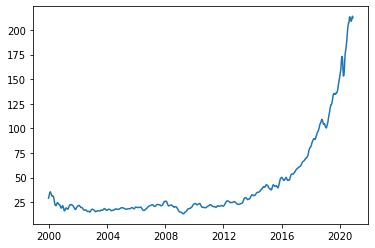

In [61]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
from click._compat import raw_input
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

class TechnicalIndicators:
    
    def __init__(self):
        self.api_key= 'IC9I5F29WLVU7CND'
        self.stock_name=self.question()
        self.macd_data=self.macd()
        self.rsi_data=self.rsi()
        self.bbands_data=self.bbands()
        self.close_data=self.close()
        self.sma_data=self.sma()
        
    def question(self):
        stock_name=raw_input("Enter stock name:")
        return stock_name
    
    def macd(self):
        a = TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data=a.get_macd(symbol=self.stock_name,interval='daily')
        return data
    
    def rsi(self):
        b=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data = b.get_rsi(symbol=self.stock_name,interval='daily',time_period=14)
        return data
    
    def bbands (self):
        c=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data=c.get_bbands(symbol=self.stock_name)
        return data
    
    def sma(self):
        d= TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data = d.get_sma(symbol=self.stock_name,time_period=30)
        return data
    
    def close(self):
        d=TimeSeries(key=self.api_key,output_format='pandas')
        data,meta_data=d.get_daily(symbol=self.stock_name,outputsize='compact')
        return data
    
if __name__ == "__main__":
    TI=TechnicalIndicators()
    close_data = TI.close_data
    sma_data = TI.sma_data
    print(close_data.head(1))
    plt.plot(sma_data)
    plt.show()

In [62]:
# date = days from today
print(close_data.iloc[0][3])

214.07


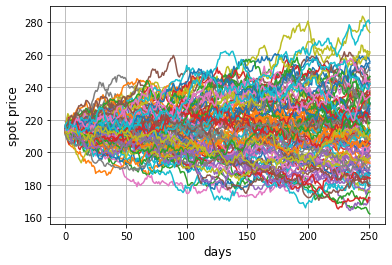

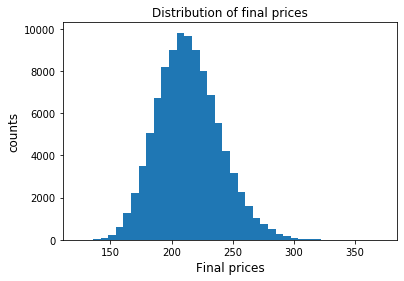

In [63]:
import numpy as np
import pylab as plt


# days to expiry
days = 252

# simulations to run
runs = 100000

spot_price = 214.07
strike = 100

# implied volatility, can change to whatever we seem fit
volatility = 0.12


# get random numbers for daily % return
np.random.seed(2)
rets = np.random.randn(runs,days) * volatility / np.sqrt(252)
rets.shape

# show monte carlo cone


# add 1 to ret so it doesn't converge to 0, multiply to spot price to get paths  
path = np.cumprod(1 + rets, 1) * spot_price 

for i in path[:100,:]:
    plt.plot(i)
    
    
plt.grid()
plt.xlabel('days',fontsize=12)
plt.ylabel('spot price',fontsize=12)
plt.show()



# show distribution
plt.hist(path[:,-1], bins = 40);
plt.title('Distribution of final prices')
plt.xlabel('Final prices', fontsize = 12)
plt.ylabel('counts', fontsize = 12)
plt.show()